In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
#take only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_cols)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [7]:
df=df.select_dtypes(include=[np.number])

In [11]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## no human body have an 0 colestrol
## lik ethat 0 resting bp also

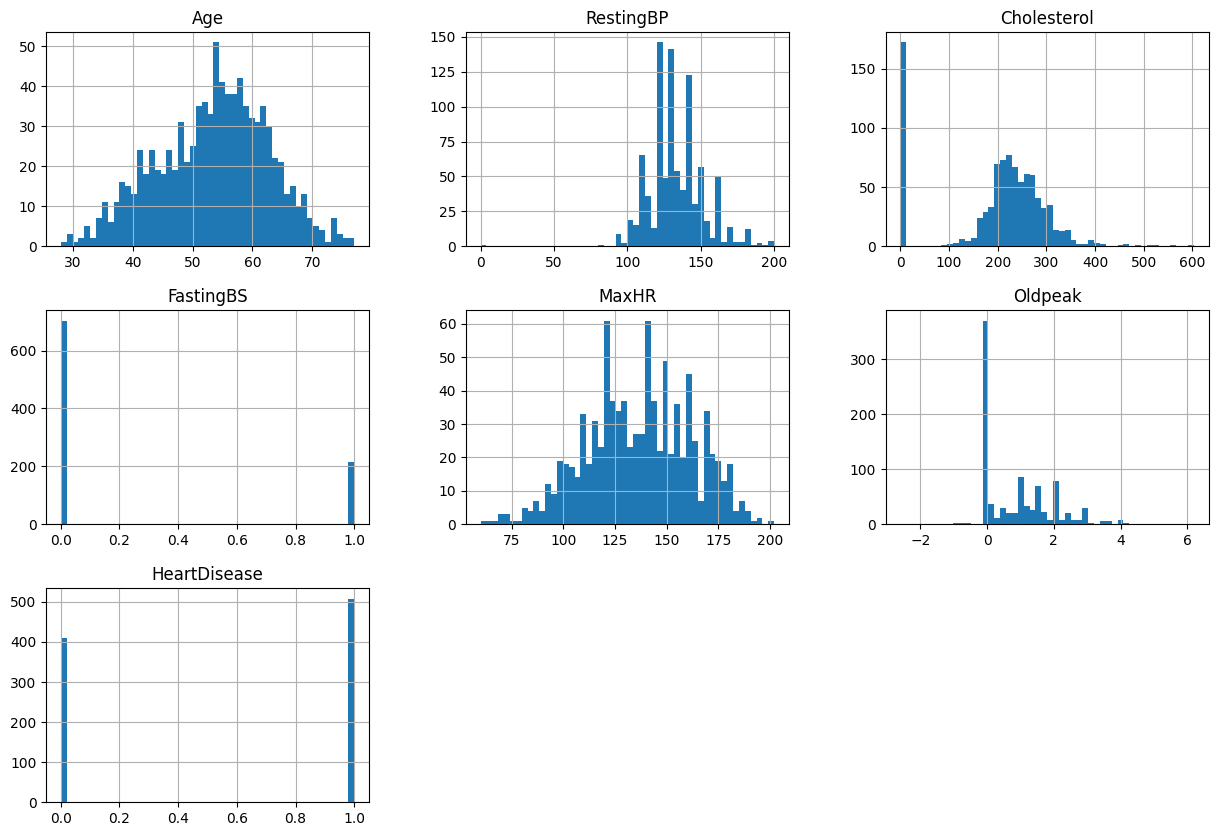

In [12]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15, 10))
plt.show()

In [14]:
#replace all 0 zero value in cholestrol and resting blood pressure with mean value of respective columns
chol_mean = df.loc[df['Cholesterol'] > 0, 'Cholesterol'].mean()
rbp_mean = df.loc[df['RestingBP'] > 0, 'RestingBP'].mean()

df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = chol_mean
df.loc[df['RestingBP'] == 0, 'RestingBP'] = rbp_mean

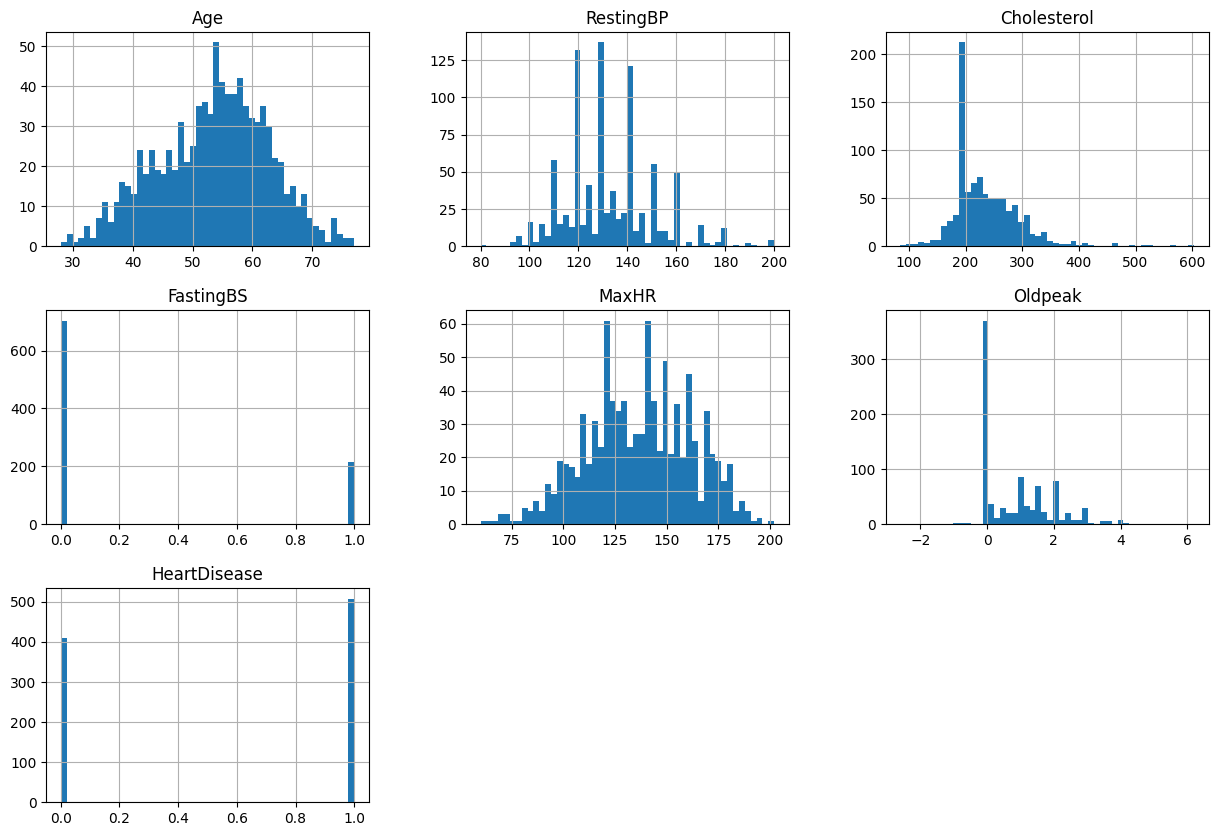

In [15]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15, 10))
plt.show()

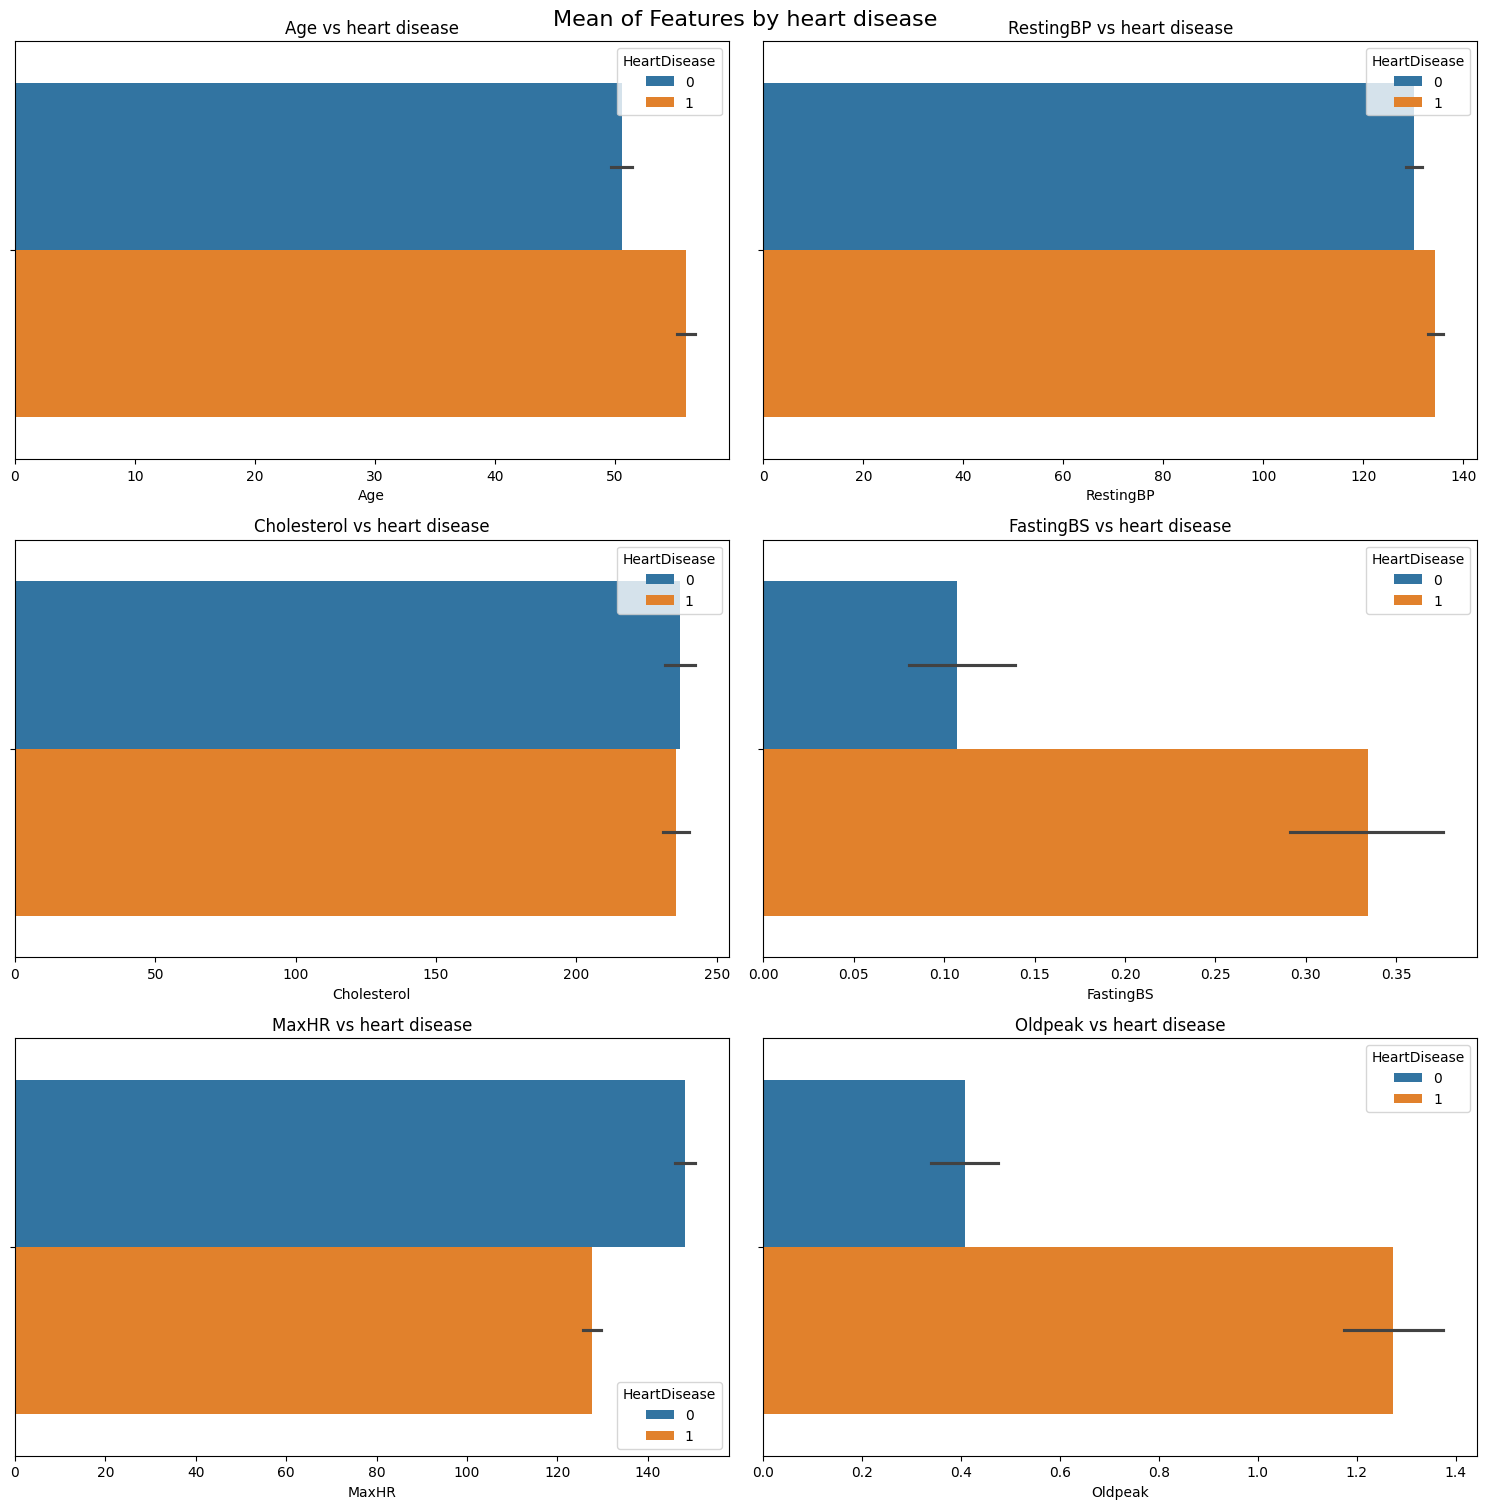

In [19]:
plt.figure(figsize=(15, 20))
i = 1
for col in df.columns:
    if col != 'HeartDisease':
        plt.subplot(4, 2, i)
        sns.barplot(x=df[col], hue=df["HeartDisease"], estimator='mean')
        plt.title(f'{col} vs heart disease')
        i += 1

plt.suptitle('Mean of Features by heart disease', fontsize=16)
plt.tight_layout()
plt.show()

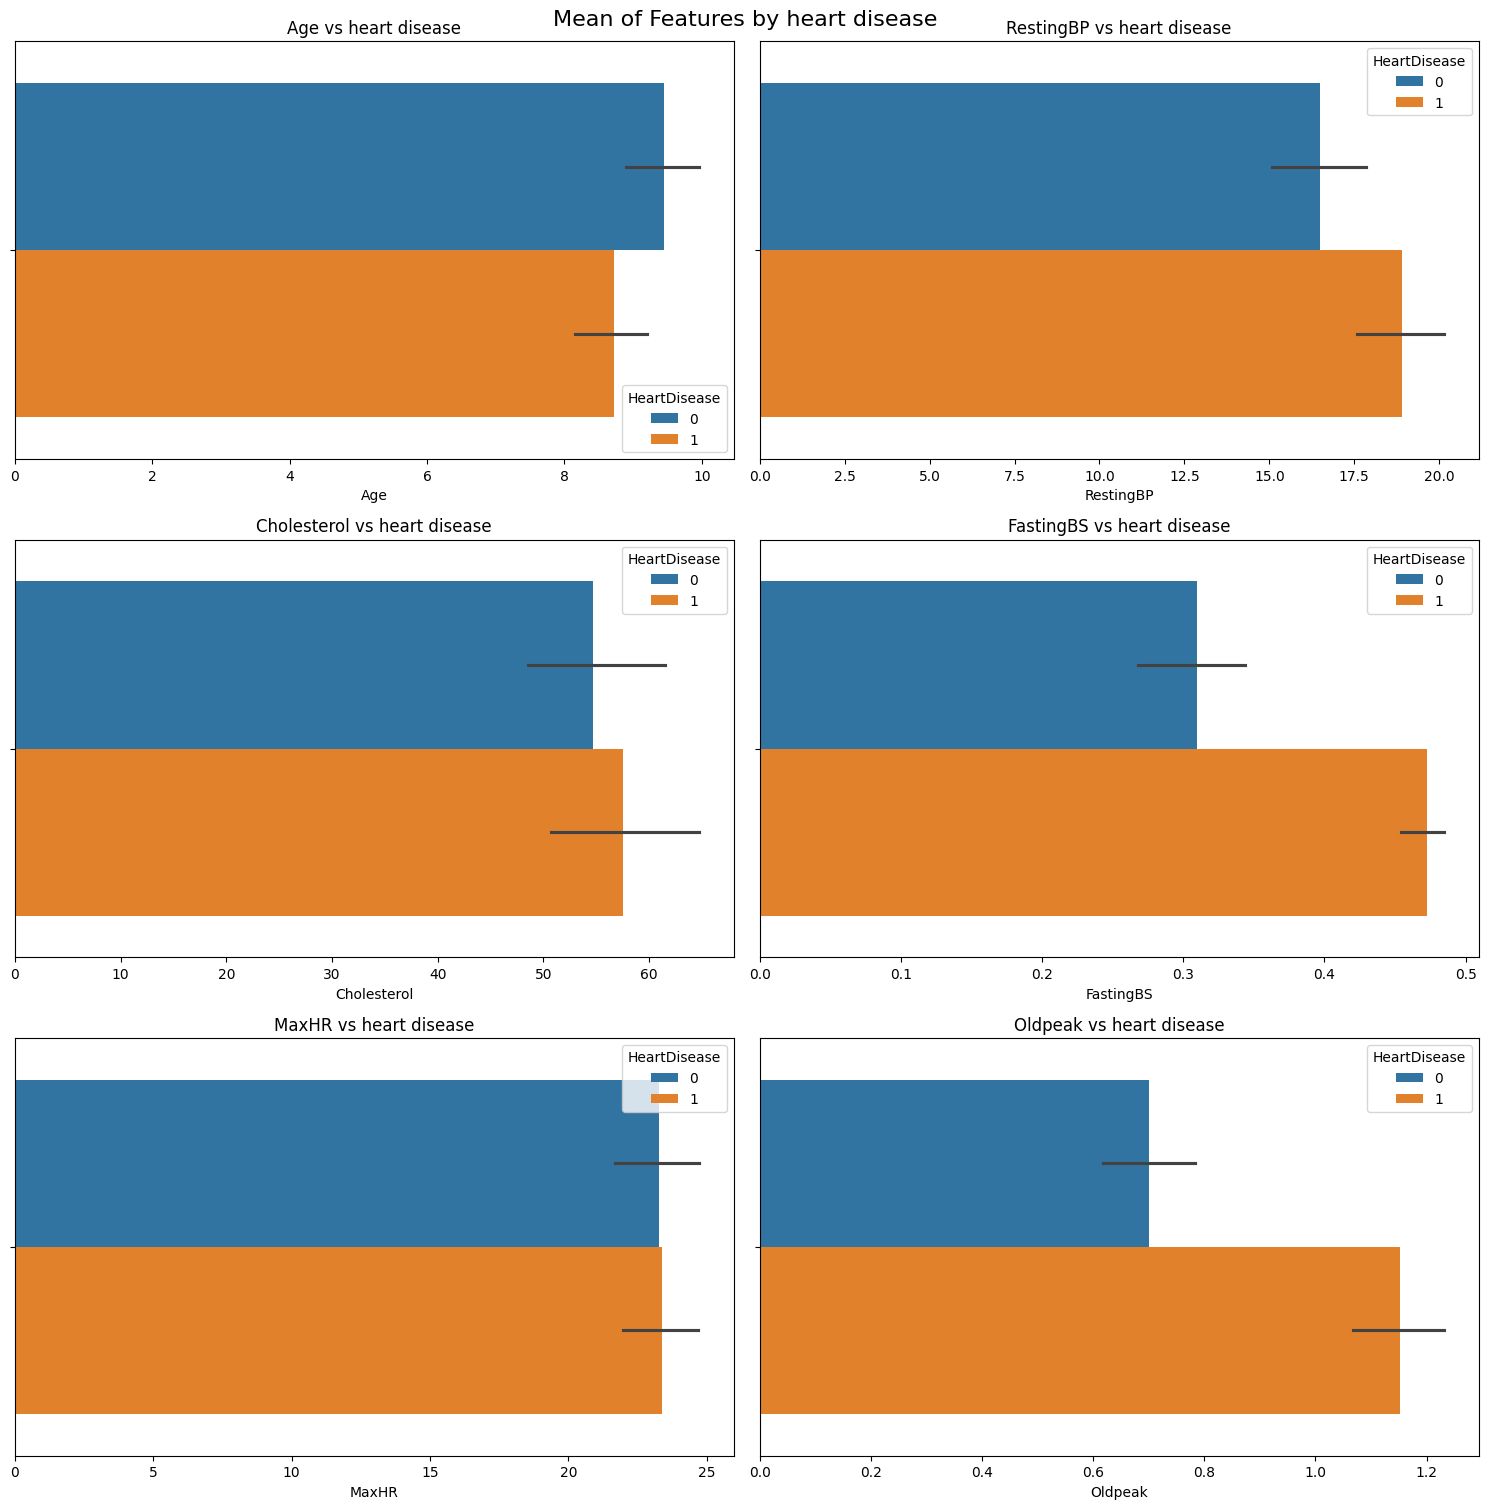

In [21]:
plt.figure(figsize=(15, 20))
i = 1
for col in df.columns:
    if col != 'HeartDisease':
        plt.subplot(4, 2, i)
        sns.barplot(x=df[col], hue=df["HeartDisease"], estimator='std')
        plt.title(f'{col} vs heart disease')
        i += 1

plt.suptitle('Mean of Features by heart disease', fontsize=16)
plt.tight_layout()
plt.show()

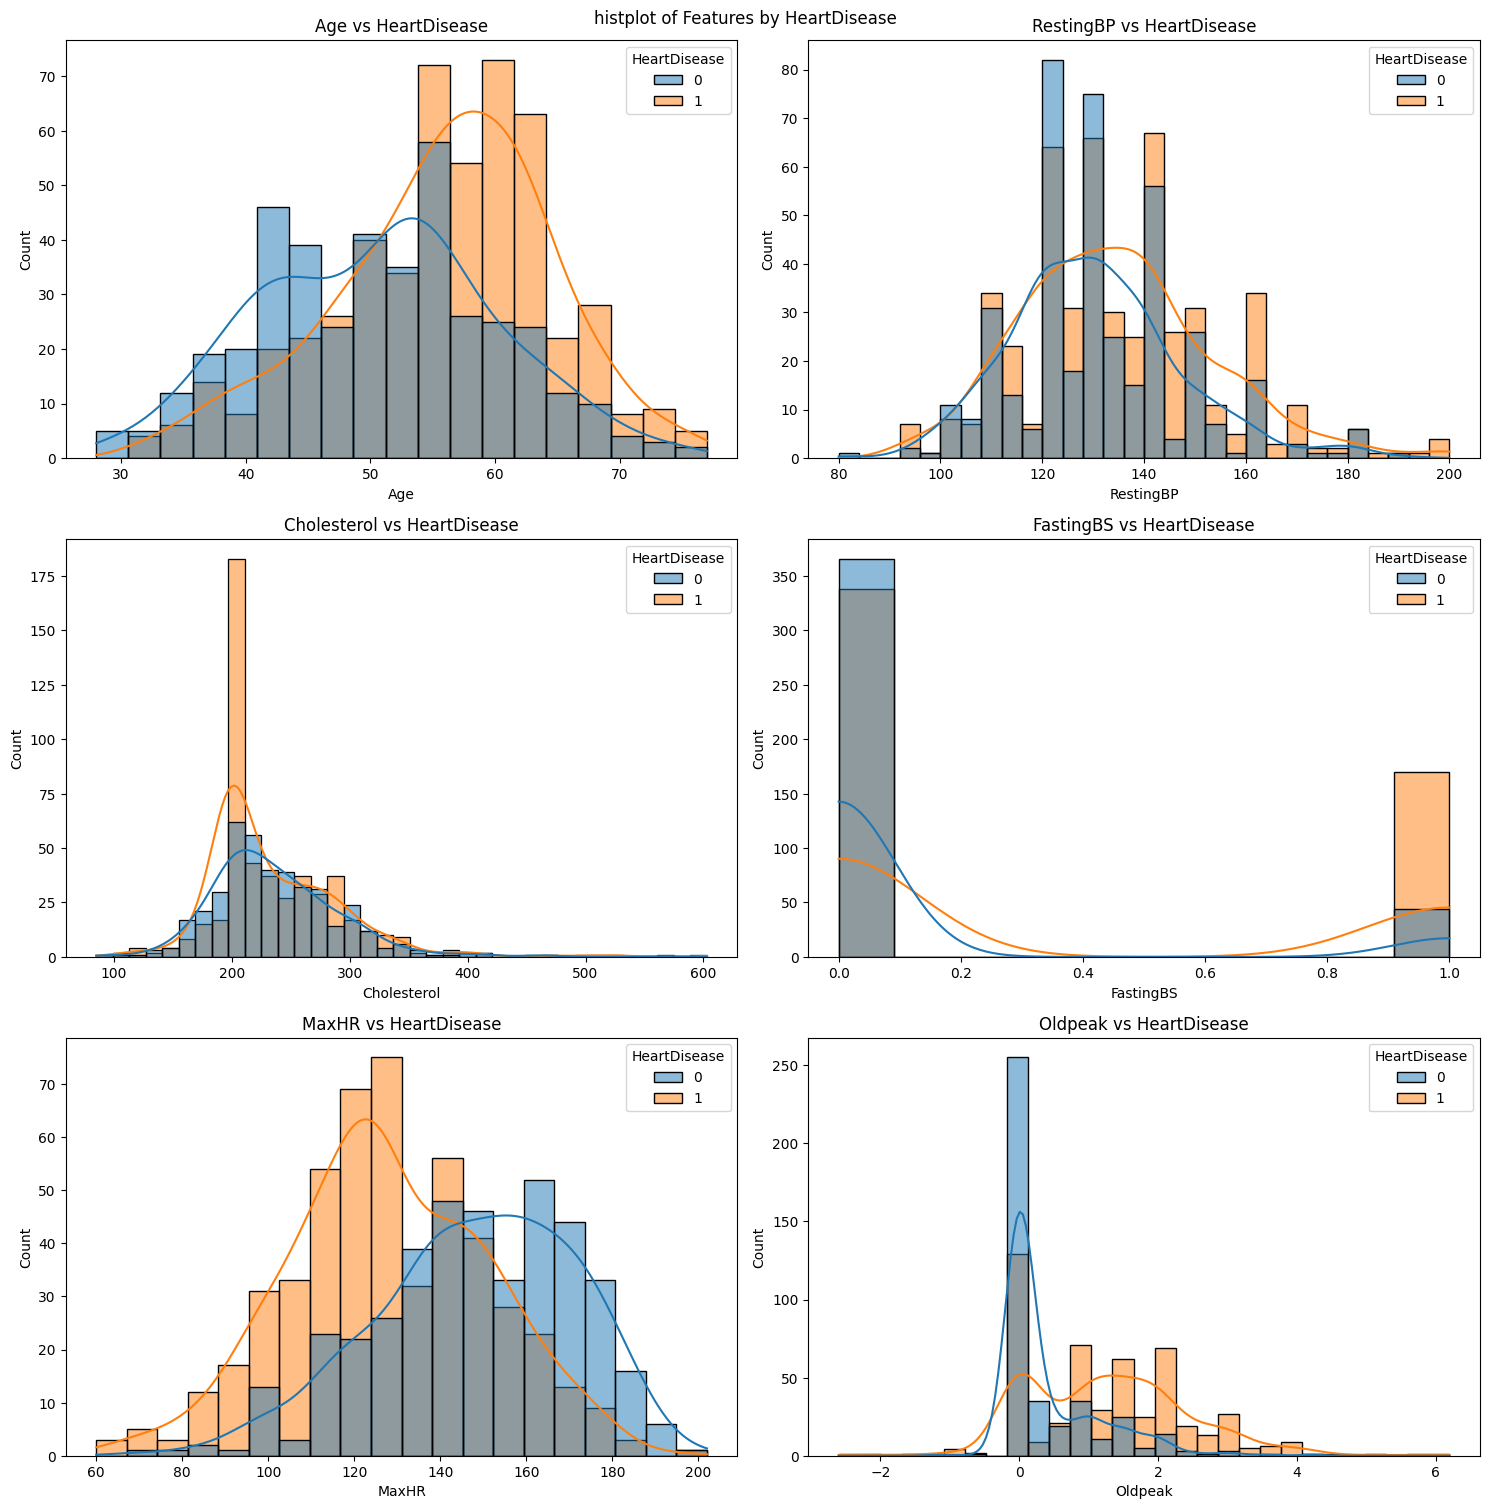

In [22]:
import seaborn as sns
#box plot for all columns against outcome
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
i = 1
for col in df.columns:
    if col != 'HeartDisease':
        plt.subplot(4, 2, i)
        sns.histplot(x=df[col], hue=df["HeartDisease"],kde=True)
        plt.title(f'{col} vs HeartDisease')
        i += 1

plt.suptitle('histplot of Features by HeartDisease')
plt.tight_layout()
plt.show()

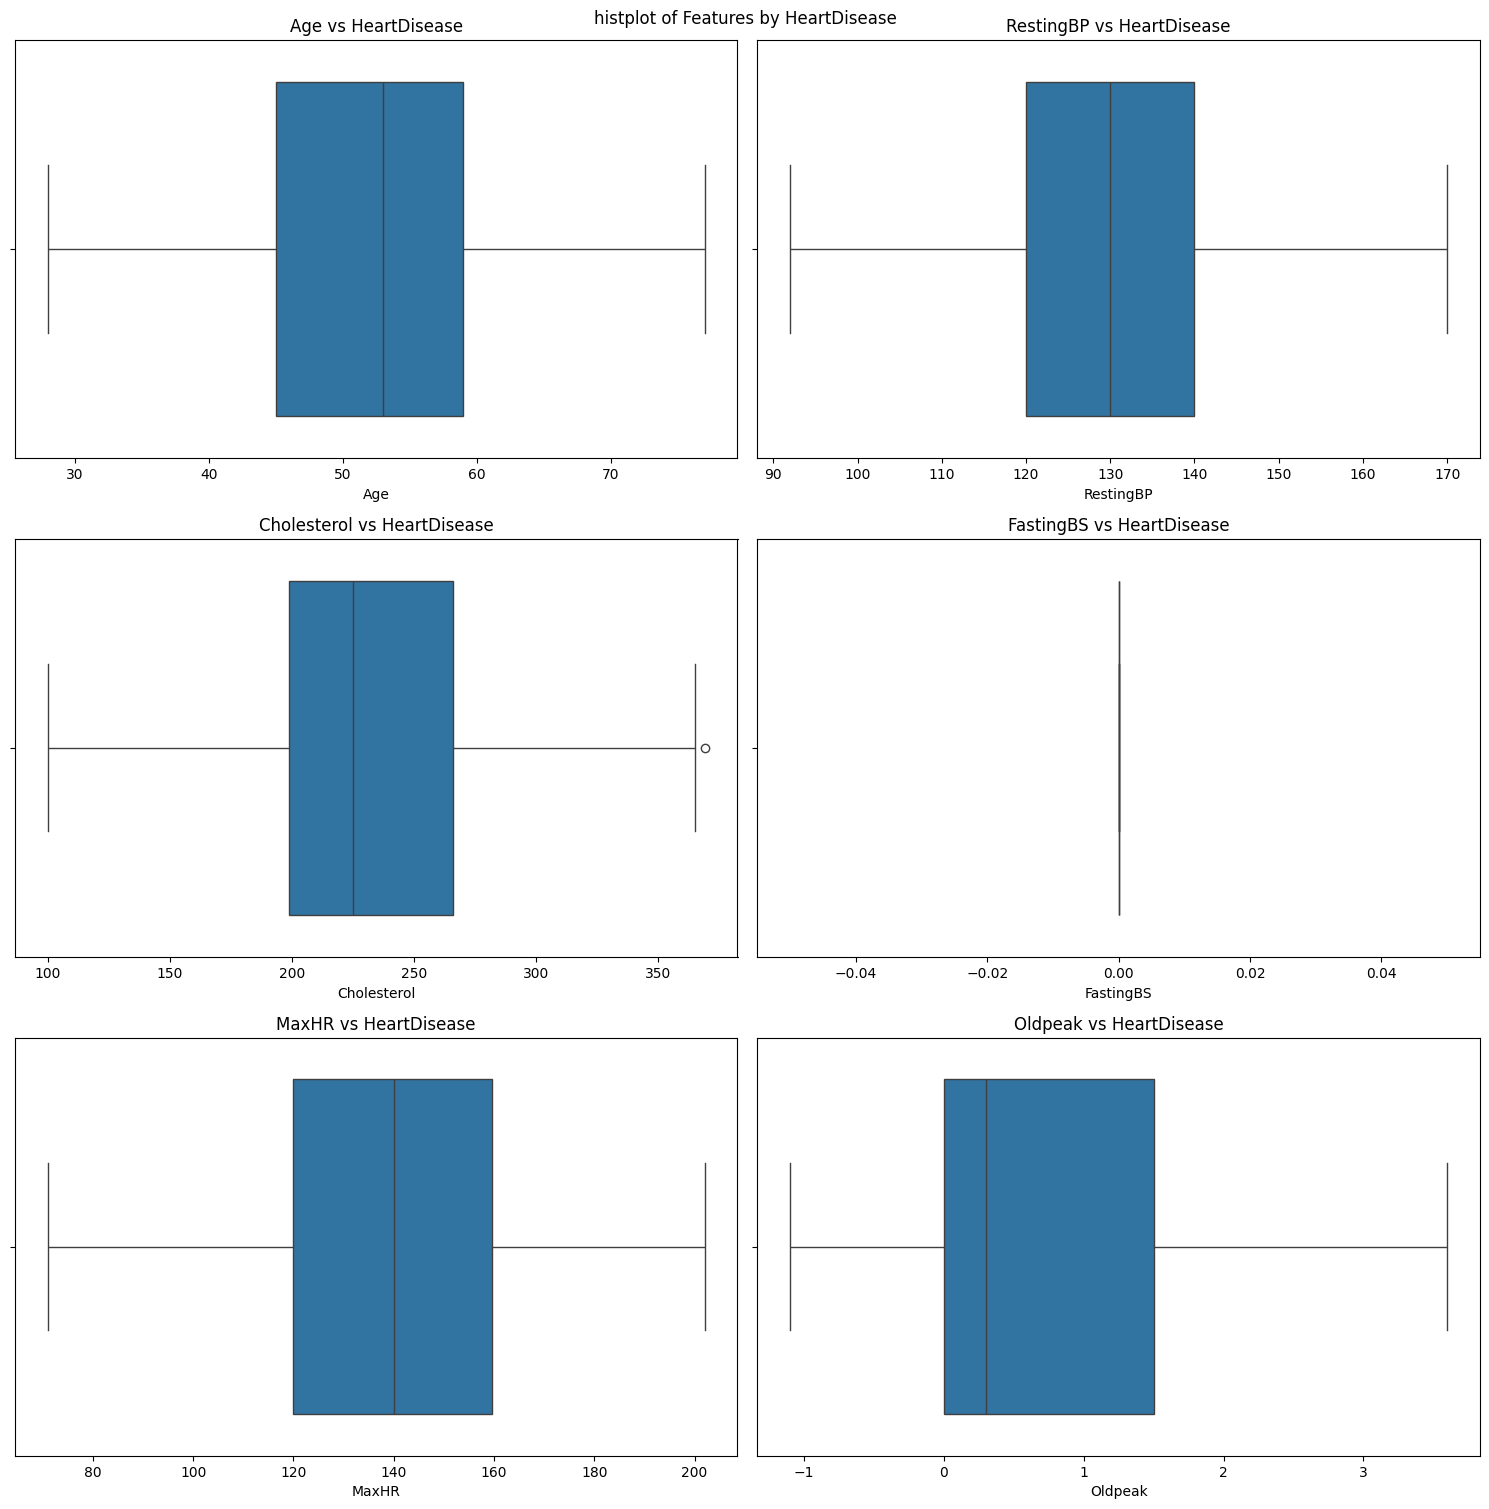

In [25]:
plt.figure(figsize=(15, 20))
i = 1
for col in df.columns:
    if col != 'HeartDisease':
        plt.subplot(4, 2, i)
        sns.boxplot(x=df[col])
        plt.title(f'{col} vs HeartDisease')
        i += 1

plt.suptitle('histplot of Features by HeartDisease')
plt.tight_layout()
plt.show()

In [26]:
#removing only outliers
outlier_idx = set()
feature_cols = [c for c in numerical_cols if c != col]  # exclude target column

for c in feature_cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mask = (df[c] < lower_bound) | (df[c] > upper_bound)
    outlier_idx.update(df.index[mask])

df = df.drop(index=list(outlier_idx))
print(df.shape)

(658, 7)


In [27]:
#mimmax sclaer except pregnacies and outcome
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = [col for col in df.columns ]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [28]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.244898,0.615385,0.713208,0.0,0.770992,0.234043,0.0
1,0.428571,0.871795,0.301887,0.0,0.648855,0.446809,1.0
2,0.183673,0.487179,0.690566,0.0,0.206107,0.234043,0.0
3,0.408163,0.589744,0.430189,0.0,0.282443,0.553191,1.0
4,0.530612,0.743590,0.358491,0.0,0.389313,0.234043,0.0


In [29]:
x=df.drop('HeartDisease', axis=1)
y=df['HeartDisease']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.7566539923954373
0.7348484848484849


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
print(X_test.shape)
y_prob = model.predict_proba(X_test) [:, 1]
print(y_prob.shape)
print(y_prob)

(132, 6)
(132,)
[0.43900923 0.58846471 0.48895008 0.52971122 0.77972002 0.21361147
 0.3765066  0.66217139 0.2245064  0.19904537 0.2287016  0.59206687
 0.26544957 0.52895188 0.51451001 0.75340085 0.22430451 0.76460854
 0.52830191 0.13924653 0.08833102 0.33827569 0.60084312 0.15777789
 0.86071004 0.40171149 0.09241048 0.39166992 0.83611965 0.83997789
 0.46248904 0.32369612 0.64569537 0.14393872 0.93670182 0.17933617
 0.2233707  0.31602159 0.45405453 0.26229514 0.65857572 0.54806893
 0.77990412 0.8257386  0.69376277 0.13193359 0.83167078 0.29121101
 0.23596187 0.47501368 0.1492724  0.27778997 0.76524439 0.14052613
 0.83959058 0.18797398 0.54743751 0.48686466 0.49085146 0.41373584
 0.51592417 0.66552077 0.73920218 0.28049022 0.70089652 0.78077653
 0.28694824 0.18722107 0.7735085  0.18216047 0.11191957 0.21607473
 0.28317695 0.7108482  0.26733586 0.49281309 0.68251878 0.256773
 0.69749908 0.33501608 0.2281189  0.54376743 0.57016071 0.55644102
 0.47869799 0.1961269  0.17642282 0.51959453 0.1

In [32]:
# probability of positive class
fpr, tpr, thresholds=roc_curve(y_test, y_prob)
auc_score=roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)


AUC Score: 0.7837837837837838


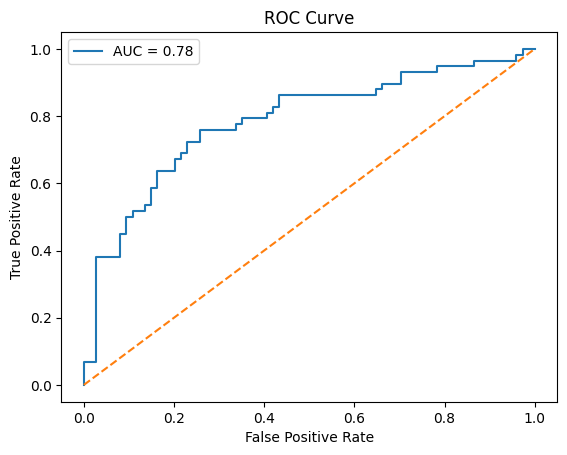

In [33]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--') # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()